In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Loading the Data into Python and understanding the data</h3>

In [6]:
# Define the path to your dataset (adjust if necessary)
dataset_path = 'UCI HAR Dataset/' # Assuming you are running from the parent directory of UCI HAR Dataset

# Load training data
X_train = pd.read_csv(f'{dataset_path}train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv(f'{dataset_path}train/y_train.txt', delim_whitespace=True, header=None)
subject_train = pd.read_csv(f'{dataset_path}train/subject_train.txt', delim_whitespace=True, header=None)

# Load test data
X_test = pd.read_csv(f'{dataset_path}test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv(f'{dataset_path}test/y_test.txt', delim_whitespace=True, header=None)
subject_test = pd.read_csv(f'{dataset_path}test/subject_test.txt', delim_whitespace=True, header=None)

# Load features and activity labels
features = pd.read_csv(f'{dataset_path}features.txt', delim_whitespace=True, header=None)
activity_labels = pd.read_csv(f'{dataset_path}activity_labels.txt', delim_whitespace=True, header=None)

# Let's inspect the shapes of the loaded dataframes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("subject_train shape:", subject_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("subject_test shape:", subject_test.shape)
print("features shape:", features.shape)
print("activity_labels shape:", activity_labels.shape)

/tmp/ipykernel_21397/1679190789.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(f'{dataset_path}train/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(f'{dataset_path}train/y_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_train = pd.read_csv(f'{dataset_path}train/subject_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use `

X_train shape: (7352, 561)
y_train shape: (7352, 1)
subject_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)
subject_test shape: (2947, 1)
features shape: (561, 2)
activity_labels shape: (6, 2)


/tmp/ipykernel_21397/1679190789.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(f'{dataset_path}test/y_test.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_test = pd.read_csv(f'{dataset_path}test/subject_test.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(f'{dataset_path}features.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_21397/1679190789.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\

Assigning feature names, activity names, see the distribution of each class, data scaling and seeing the scaled data

X_train with feature names:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAc

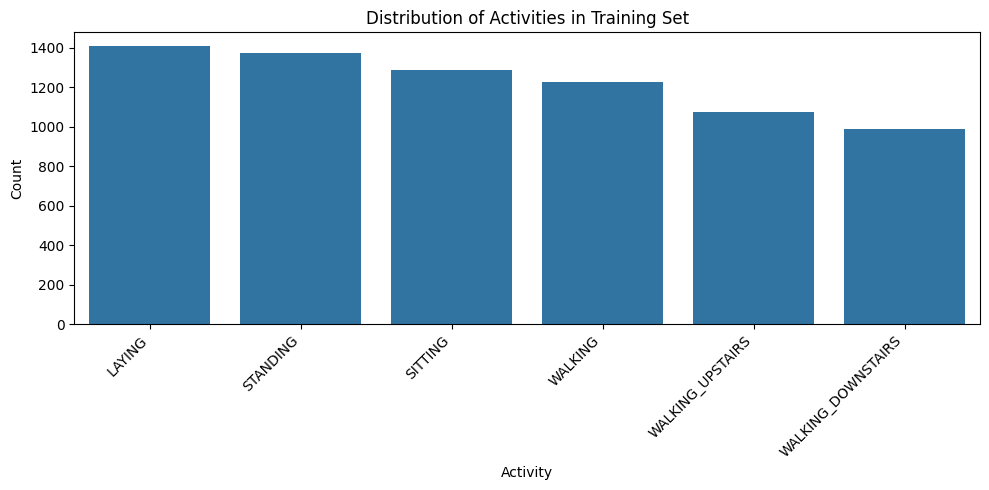


X_train_scaled head (first 5 rows, first 5 columns):
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.200642          -0.063683          -0.419628         -0.868814   
1           0.055948           0.031486          -0.253908         -0.875426   
2           0.073515          -0.043416          -0.076295         -0.869039   
3           0.066696          -0.208422          -0.249712         -0.870626   
4           0.030469           0.027587          -0.109848         -0.875188   

   tBodyAcc-std()-Y  
0         -0.939441  
1         -0.923902  
2         -0.907760  
3         -0.940022  
4         -0.934878  


In [ ]:
# 1. Assign Feature Names
feature_names = features[1].tolist() # features is a DataFrame with 2 columns, we want the second one
X_train.columns = feature_names
X_test.columns = feature_names

print("X_train with feature names:")
print(X_train.head())
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())




# 2. Assign Activity Names
activity_labels_dict = activity_labels.set_index(0)[1].to_dict()
y_train_labels = y_train[0].map(activity_labels_dict)
y_test_labels = y_test[0].map(activity_labels_dict)

print("\ny_train with activity names:")
print(y_train_labels.head())




# 3. Analyze Activity Distribution 
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_labels, order=y_train_labels.value_counts().index)
plt.title('Distribution of Activities in Training Set')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Data Scaling (Shared task)
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform both training and test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if you want to keep column names, optional for most models
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

print("\nX_train_scaled head (first 5 rows, first 5 columns):")
print(X_train_scaled.iloc[:, :5].head())

Implementing and training basic models